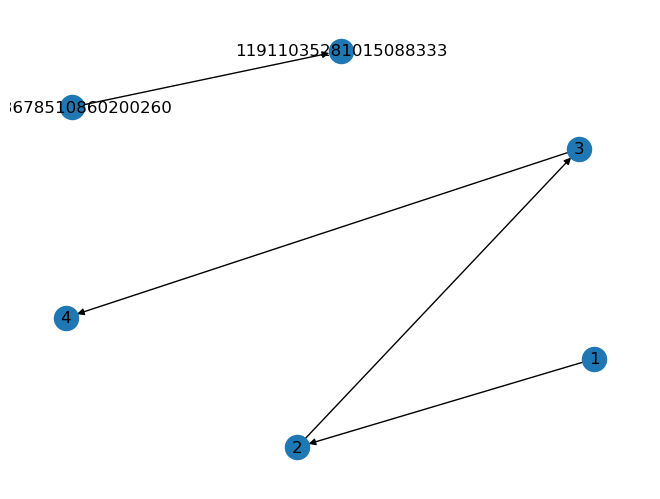

In [7]:
from raphtory import Graph
from raphtory import algorithms
from raphtory import Perspective
from raphtory import plot


g = Graph(4)
g.add_vertex(1, "Gandalf")
g.add_edge(1, "Gandalf", "Ben", properties={"Race": 1, "prop1": 0.5, "is_tired": True})
g.add_edge(1, 1, 2, properties={"Race": 1})
g.add_edge(1, 2, 3, {})
g.add_edge(1, 3, 4, {})

view = g.at(1)
plot.draw(view, with_labels=True)

In [8]:
view

Graph(NumEdges(4), NumVertices(6), EarliestTime(1), LatestTime(1))

In [9]:
g

Graph(NumEdges(4), NumVertices(6), EarliestTime(1), LatestTime(1))

In [10]:
view.vertex("Gandalf")

Vertex(VertexName(Gandalf), Properties({_id : Gandalf}))

In [5]:
view.edge("Gandalf","Ben")

Edge(Src(Gandalf), Dst(11911035281015088333), Properties({Race : 1, prop1 : 0.5, is_tired : 1})